In [1]:
# import Denpendencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import time

## Extraction Phase

#### The raw data is obtained from home credit default risk. Its source link is available in reference. This data has six tables which are cleaned step by step.

## Transformation Phase

### Raw Data Importing for cleaning

In [2]:
# Dictionary to hold file names and their paths
file_paths = {
    'application_train': '../Resources/application_train.csv',
    'bureau': '../Resources/bureau.csv',
    'bureau_balance': '../Resources/bureau_balance.csv',
    'credit_card_balance': '../Resources/credit_card_balance.csv',
    'POS_CASH_balance': '../Resources/POS_CASH_balance.csv',
    'previous_application': '../Resources/previous_application.csv',
    'installments_payments': '../Resources/installments_payments.csv'
}

# Dictionary to hold the loaded data
data_frames = {}

# Loop through the file_paths dictionary to load each file
for file_name, relative_path in file_paths.items():
    # Construct the absolute path
    file_path = os.path.abspath(relative_path)
    
    # Attempt to load the CSV file into a DataFrame
    try:
        data_frames[file_name] = pd.read_csv(file_path)
        print(f"{file_name} data loaded successfully!")
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"An error occurred while loading {file_name}: {e}")



application_train data loaded successfully!
bureau data loaded successfully!
bureau_balance data loaded successfully!
credit_card_balance data loaded successfully!
POS_CASH_balance data loaded successfully!
previous_application data loaded successfully!
installments_payments data loaded successfully!


In [3]:
# view application_train data
application_train_df = data_frames['application_train']
application_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# check the the duplicate values of SK_ID_CURR; since we will be keeping SK_ID_CURR unique
application_train_df = application_train_df.drop_duplicates(subset='SK_ID_CURR')

In [5]:
# data set after dropping duplicates
print(application_train_df.shape)

(307511, 122)


In [6]:
# Copy the application_train_df for using in Method 2
application_train_df_unsupervised = application_train_df.copy()

In [7]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = application_train_df.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_CURR'] = application_train_df['SK_ID_CURR']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = application_train_df.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = application_train_df['SK_ID_CURR']


In [8]:
# Print the selected numerical data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)

SK_ID_CURR along with Numerical Columns:


        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351

In [9]:
# print selected categorical data
print("\nSK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)


SK_ID_CURR along with Categorical Columns:
       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied              

### Inspecting the columns for NaN values.
##### for deeper insight into columns; loop through databased selected columns.

In [10]:
# Inspect NaN values in categorical columns
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: count, dtype: int64
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64
NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civ

occupation type has 96391 ,FONDKAPREMONT_MODE 210295,HOUSETYPE_MODE 154297,WALLSMATERIAL_MODE 154297,EMERGENCYSTATE_MODE 145755

In [11]:
# Loop through each numerical columns
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

TARGET
0    282686
1     24825
Name: count, dtype: int64
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64
AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: count, Length: 5603, dtype: int64
AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: 

In [12]:
# fillna numerical columns with 0.
numerical_and_id= numerical_and_id.fillna(0)

In [13]:
# Inspect numerical columns after filling na with 0.
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

TARGET
0    282686
1     24825
Name: count, dtype: int64
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64
AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: count, Length: 5603, dtype: int64
AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: 

In [14]:
# Merge the categorical and numerical columns
merge_data = pd.merge(numerical_and_id,categorical_and_id,on="SK_ID_CURR")

In [15]:
# print the merge dataset.
print(merge_data)

        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351

#### Using RandomForestClassifer to fill the missing categorical values.

In [16]:
# Record the start time
start_time = time.time()
time.sleep(2)  # This makes the program wait for 2 seconds
# Identify columns with missing categorical values
categorical_columns_with_missing = merge_data.select_dtypes(include='object').columns[merge_data.select_dtypes(include='object').isnull().any()]

# Create a copy of the DataFrame
df_filled = merge_data.copy()

# Initialize a dictionary to store accuracy scores for each column
accuracy_scores = {}

# Iterate over each column with missing categorical values
for col in categorical_columns_with_missing:
    print(f"Filling missing values for {col}")

    # Create a mask for missing values
    missing_mask = df_filled[col].isnull()

    # Split the data into known and unknown samples
    known_samples = df_filled[~missing_mask]
    unknown_samples = df_filled[missing_mask]

    # Drop the target column from known samples
    X_known = known_samples.drop(columns=[col])
    y_known = known_samples[col]

    # Create a preprocessor for numerical and categorical columns
    numerical_features = X_known.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_known.select_dtypes(include='object').columns

    numerical_transformer = SimpleImputer(strategy='mean')
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Create and fit the classifier
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

    clf.fit(X_known, y_known)

    # Predict missing values for unknown samples
    X_unknown = unknown_samples.drop(columns=[col])
    y_unknown_predicted = clf.predict(X_unknown)

    # Fill missing values in the original DataFrame
    df_filled.loc[missing_mask, col] = y_unknown_predicted

    # Calculate accuracy score
    accuracy = accuracy_score(known_samples[col], clf.predict(X_known))
    accuracy_scores[col] = accuracy

    print(f"Filled {sum(missing_mask)} missing values for {col} with accuracy: {accuracy:.4f}")

    # Check if there are still NaN values after imputation
    nan_columns = df_filled.columns[df_filled.isnull().any()]
    if nan_columns.any():
        print(f"NaN values still present after imputation in columns: {nan_columns}")

# Ensure there are no missing values left
print("\nNumber of missing values after filling:", df_filled.isnull().sum().sum())
# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Convert to minutes and seconds
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print(f"Time taken to run the code: {minutes} minutes and {seconds} seconds")

Filling missing values for NAME_TYPE_SUITE
Filled 1292 missing values for NAME_TYPE_SUITE with accuracy: 1.0000
NaN values still present after imputation in columns: Index(['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
Filling missing values for OCCUPATION_TYPE
Filled 96391 missing values for OCCUPATION_TYPE with accuracy: 1.0000
NaN values still present after imputation in columns: Index(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')
Filling missing values for FONDKAPREMONT_MODE
Filled 210295 missing values for FONDKAPREMONT_MODE with accuracy: 1.0000
NaN values still present after imputation in columns: Index(['HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype='object')
Filling missing values for HOUSETYPE_MODE
Filled 154297 missing values for HOUSETYPE_MODE with accuracy: 1.0000
NaN values still present after 

In [25]:
# Inspect NaN values in categorical columns
# Loop through each categorical column
for column in df_filled.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(df_filled[column].value_counts(dropna=False))

TARGET
0    282686
1     24825
Name: count, dtype: int64
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64
AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5   

In [17]:

# output the cleaned file.
application_train_cleaned = df_filled.to_csv('application_trained_cleaned.csv',index = False)

## Method.2 Unsupervised learning-Clusttering

In [20]:
# Record the start time
start_time = time.time()

# Identify columns with missing values
categorical_columns_with_missing = application_train_df_unsupervised.select_dtypes(include='object').columns[application_train_df_unsupervised.select_dtypes(include='object').isnull().any()]
numerical_columns_with_missing = application_train_df_unsupervised.select_dtypes(include=['int64', 'float64']).columns[application_train_df_unsupervised.select_dtypes(include=['int64', 'float64']).isnull().any(axis=0)]

# Initialize n_clusters for KMeans
n_clusters = 5

# Create a copy of the DataFrame for preprocessing
df_filled_unsupervised = application_train_df_unsupervised.copy()

# Fill missing numerical values with 0
for col in numerical_columns_with_missing:
    df_filled_unsupervised[col] = df_filled_unsupervised[col].fillna(0)

# Prepare DataFrame for clustering (excluding categorical columns with missing values)
df_clustering = df_filled_unsupervised.drop(columns=categorical_columns_with_missing)

# Convert remaining categorical variables to dummy variables for clustering
df_clustering = pd.get_dummies(df_clustering, drop_first=True)

# Perform clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(df_clustering)

# Add the cluster information back to the df_filled DataFrame
df_filled_unsupervised['cluster'] = df_clustering['cluster']

# Fill missing categorical values based on clusters
for col in categorical_columns_with_missing:
    print(f"Filling missing values for {col} using clustering-based approach")
    # Count the number of missing values before filling
    missing_before = df_filled_unsupervised[col].isnull().sum()

    # Loop over each cluster to fill missing values
    for cluster in range(n_clusters):
        cluster_df = df_filled_unsupervised.loc[df_filled_unsupervised['cluster'] == cluster, col]

        if not cluster_df.empty:
            mode_value = cluster_df.mode().iloc[0] if not cluster_df.mode().empty else df_filled_unsupervised[col].mode()[0] if df_filled_unsupervised[col].mode().size > 0 else "Missing"
            df_filled_unsupervised.loc[(df_filled_unsupervised['cluster'] == cluster) & (df_filled_unsupervised[col].isnull()), col] = mode_value

    # Count the number of missing values after filling and calculate the filled amount
    missing_after = df_filled_unsupervised[col].isnull().sum()
    total_filled = missing_before - missing_after
    print(f"Filled {total_filled} missing values for {col}")

# Optionally, remove the cluster column if it's no longer needed
df_filled_unsupervised.drop(columns=['cluster'], inplace=True)

# Verify no missing values are left
print("\nNumber of missing values after filling:", df_filled_unsupervised.isnull().sum().sum())

# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Convert to minutes and seconds
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print(f"Time taken to run the code: {minutes} minutes and {seconds} seconds")


Filling missing values for NAME_TYPE_SUITE using clustering-based approach
Filled 1292 missing values for NAME_TYPE_SUITE
Filling missing values for OCCUPATION_TYPE using clustering-based approach
Filled 96391 missing values for OCCUPATION_TYPE
Filling missing values for FONDKAPREMONT_MODE using clustering-based approach
Filled 210295 missing values for FONDKAPREMONT_MODE
Filling missing values for HOUSETYPE_MODE using clustering-based approach
Filled 154297 missing values for HOUSETYPE_MODE
Filling missing values for WALLSMATERIAL_MODE using clustering-based approach
Filled 156341 missing values for WALLSMATERIAL_MODE
Filling missing values for EMERGENCYSTATE_MODE using clustering-based approach
Filled 145755 missing values for EMERGENCYSTATE_MODE

Number of missing values after filling: 0
Time taken to run the code: 1 minutes and 2 seconds


In [27]:
# Inspect NaN values in categorical columns
# Loop through each categorical column
for column in df_filled_unsupervised.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(df_filled_unsupervised[column].value_counts(dropna=False))

TARGET
0    282686
1     24825
Name: count, dtype: int64
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64


AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: count, Length: 5603, dtype: int64
AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: count, Length: 13673, dtype: int64
AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
447606.0         1
2106000.0        1
894654.0         1
323982.0         1
743863.5         1
Name: count, Length: 1003, dtype: int64
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
NAME_INCOME_TYPE
Worki

## Comparison of Supervised and Unsupervised Data Cleaning

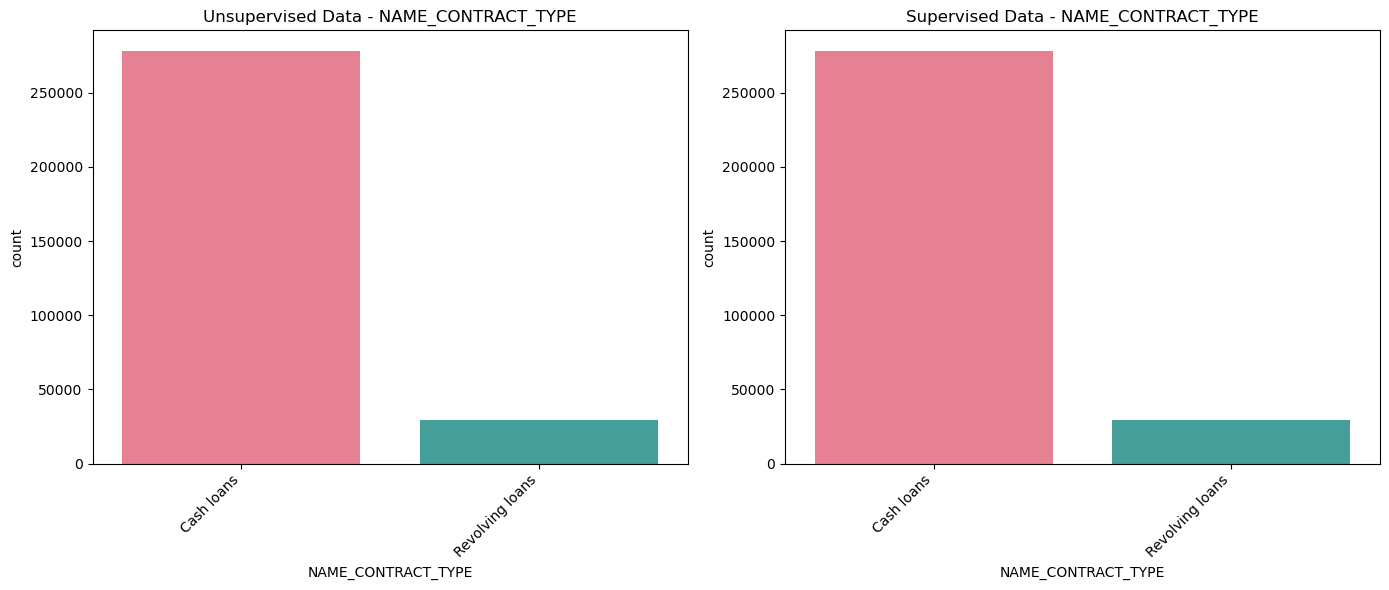

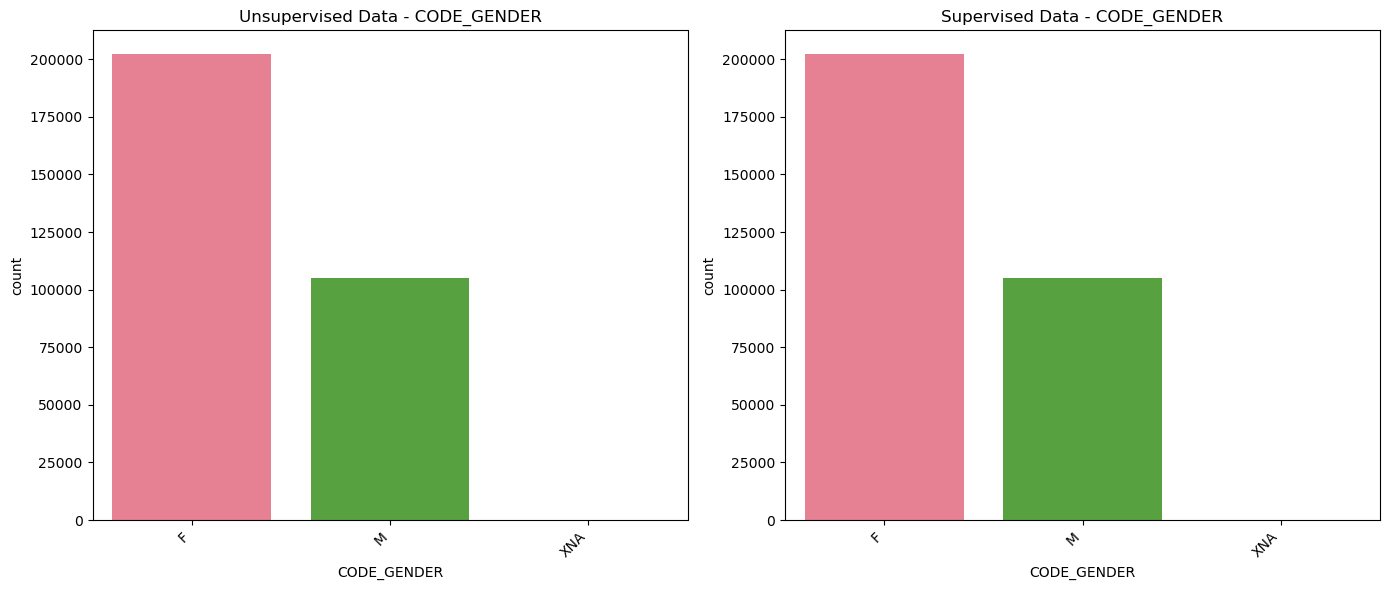

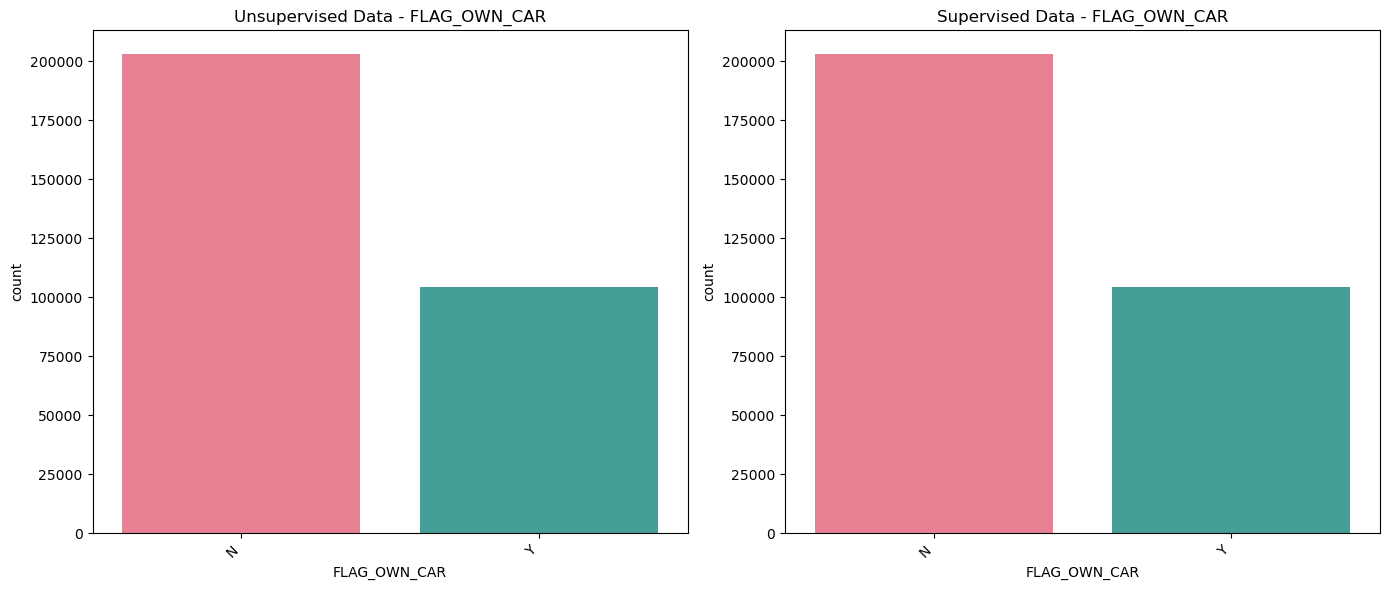

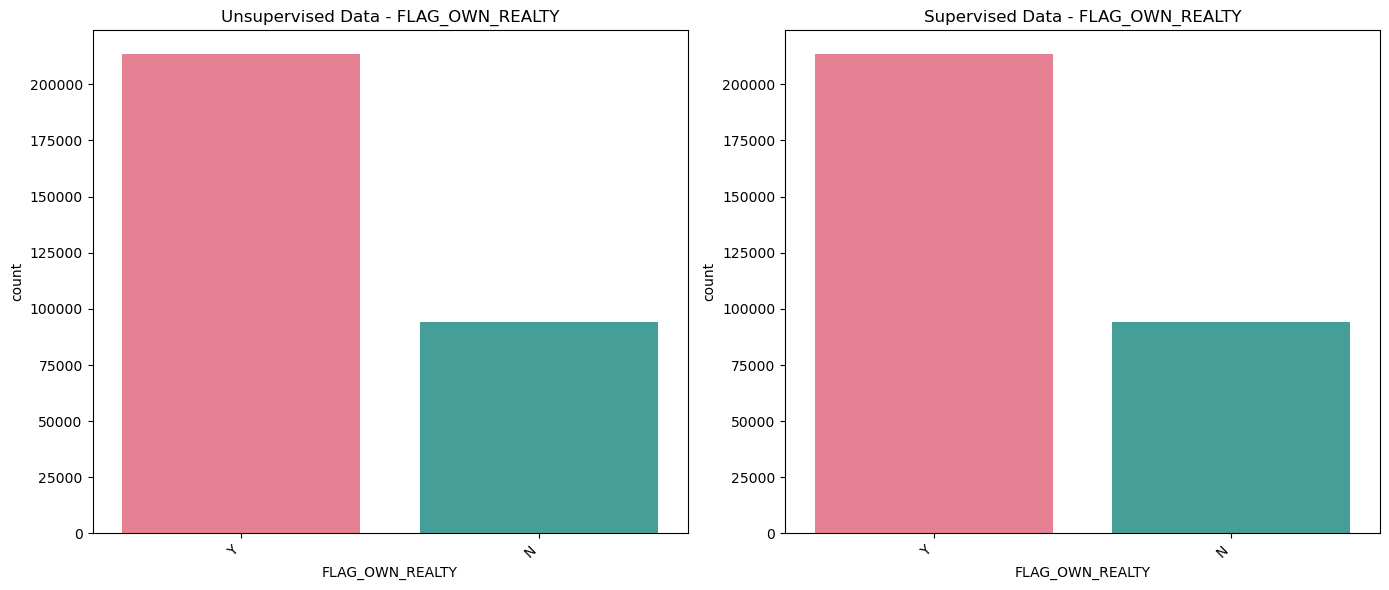

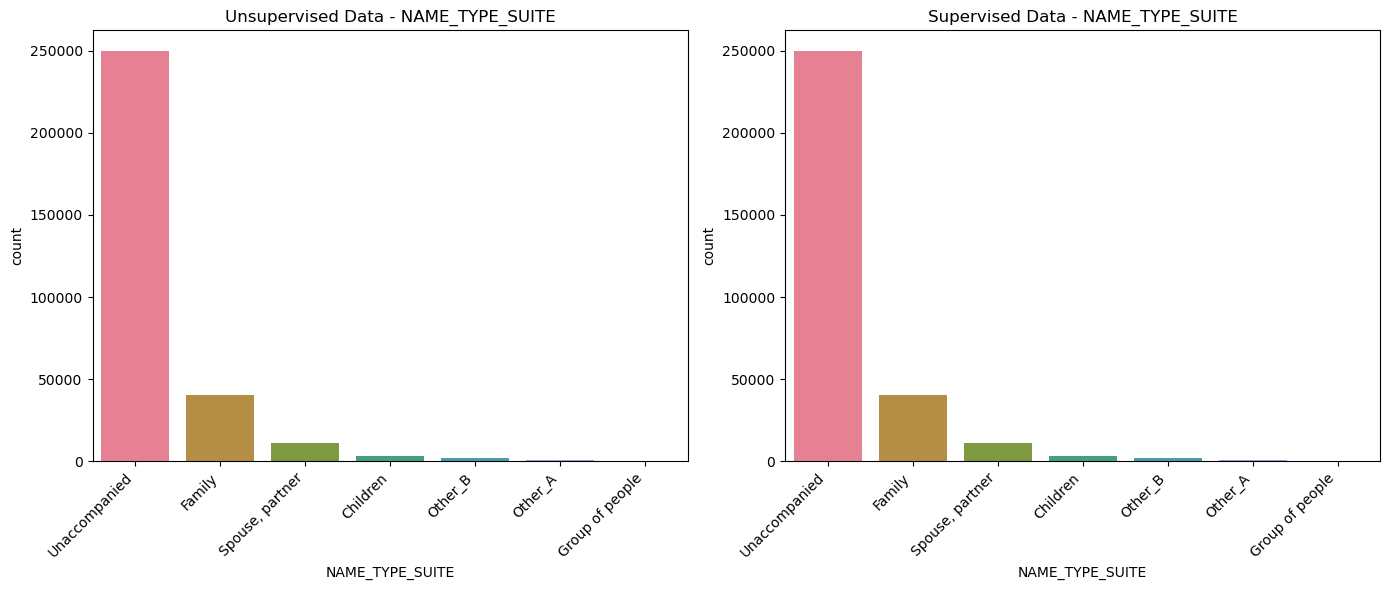

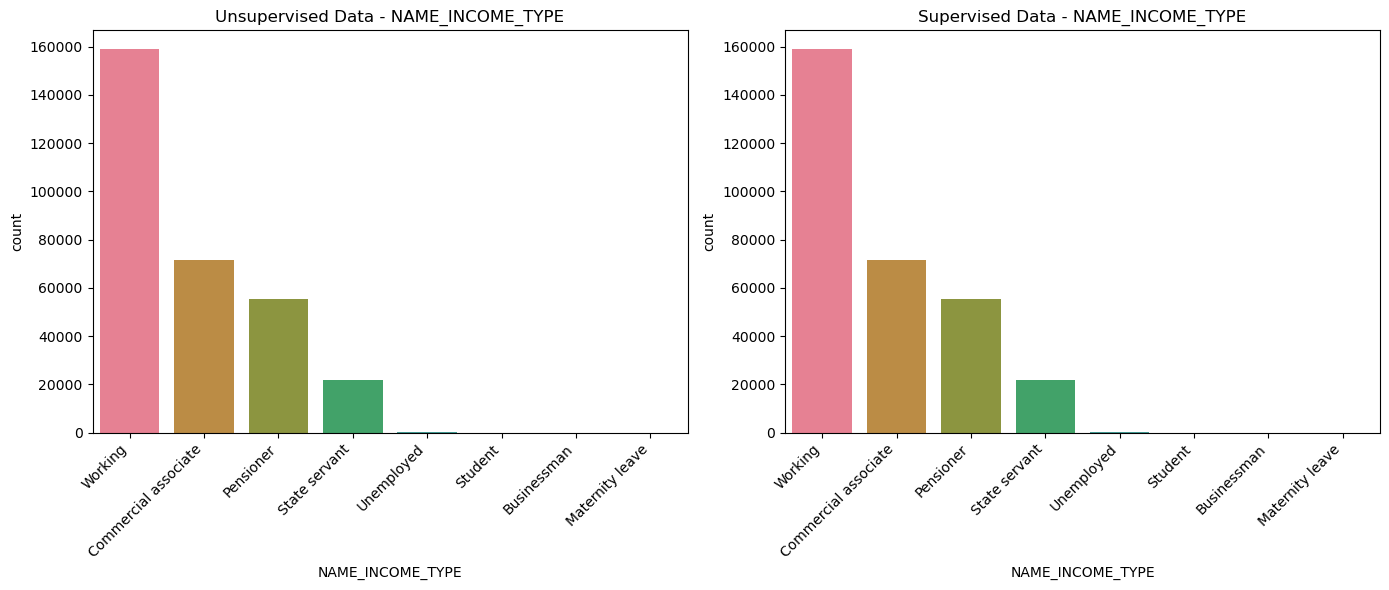

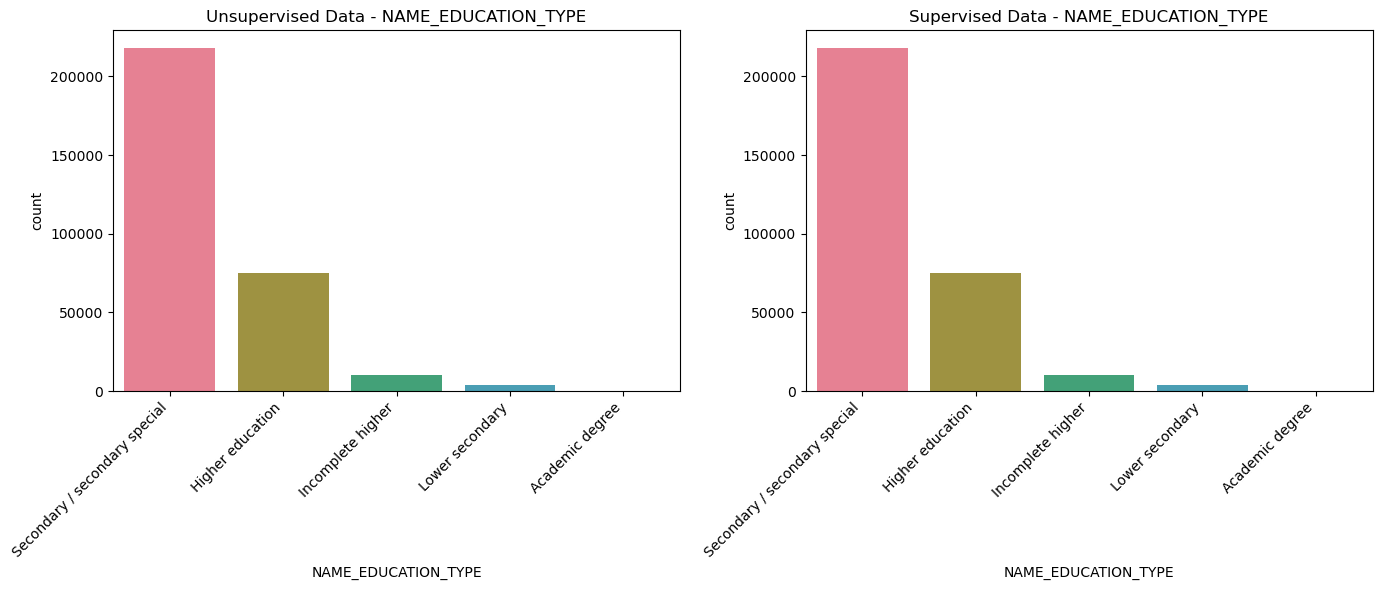

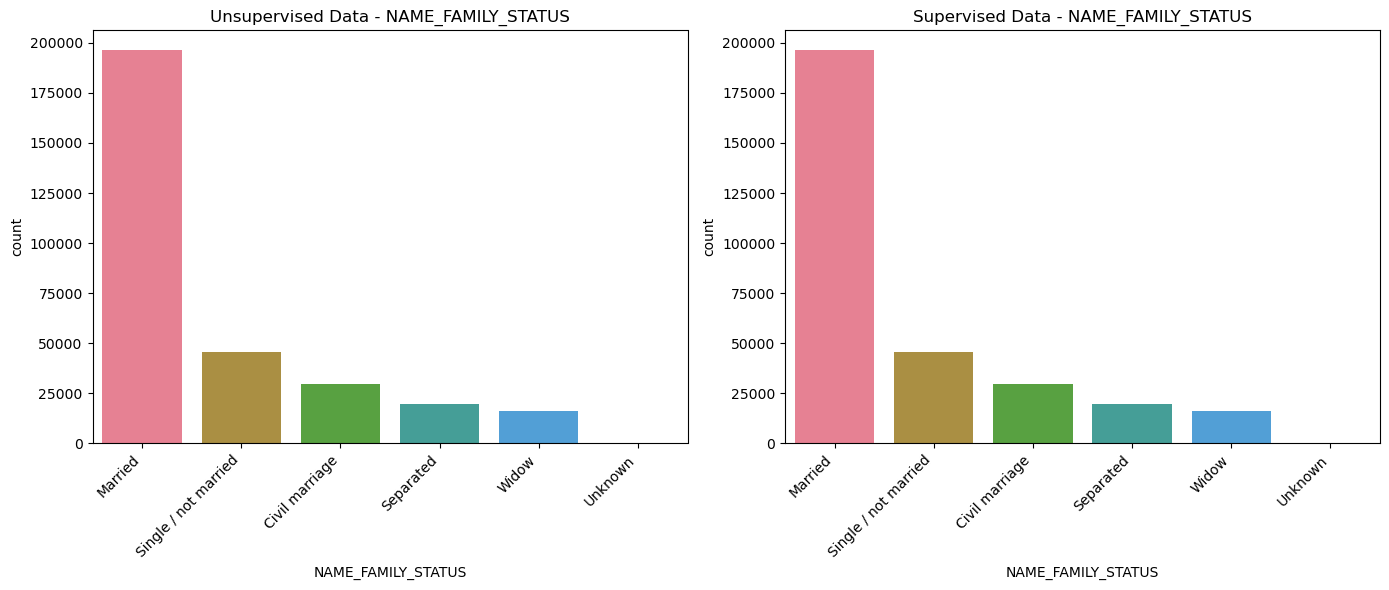

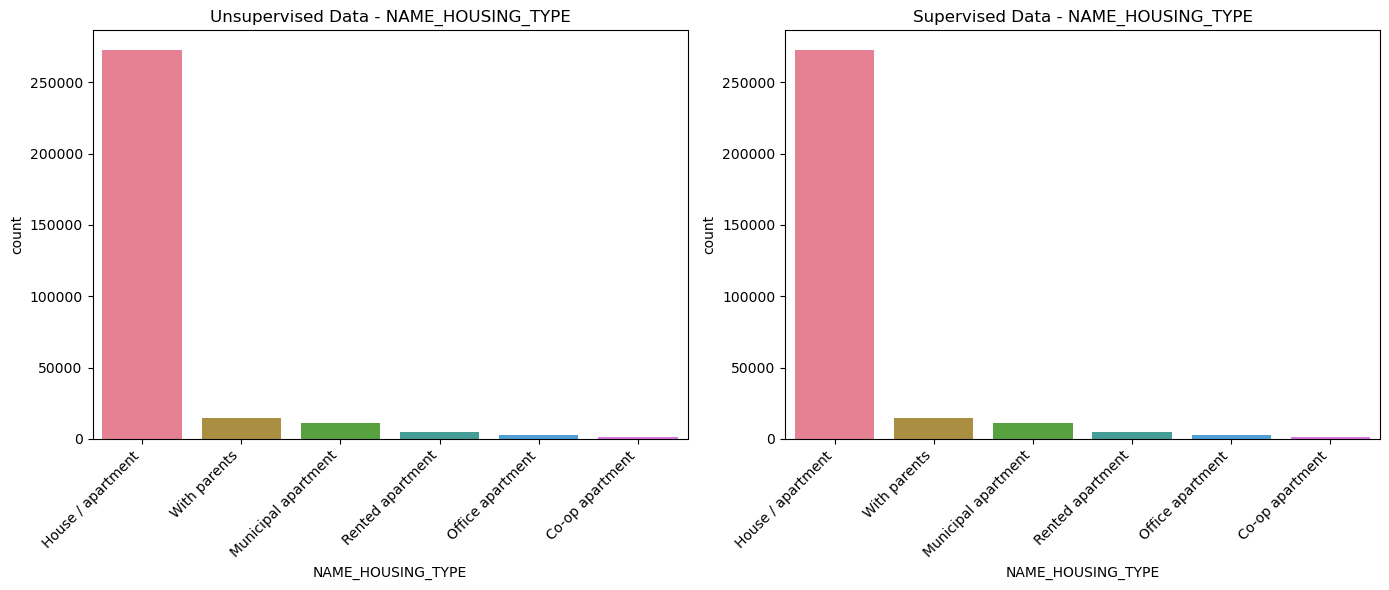

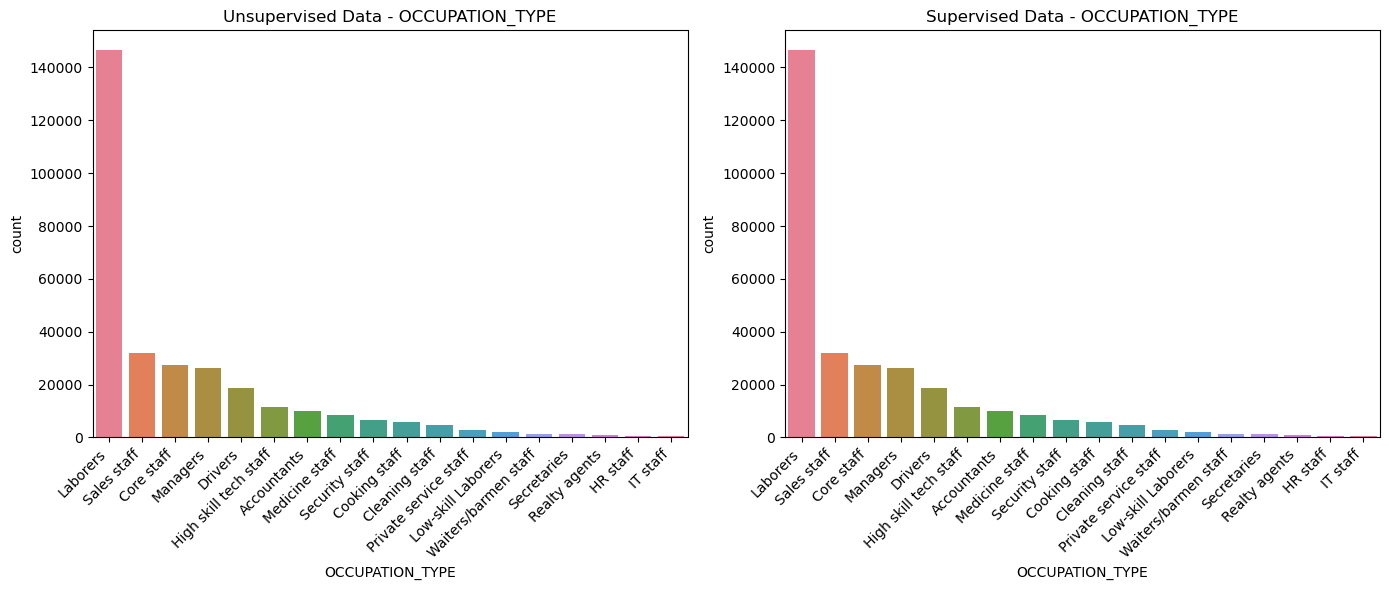

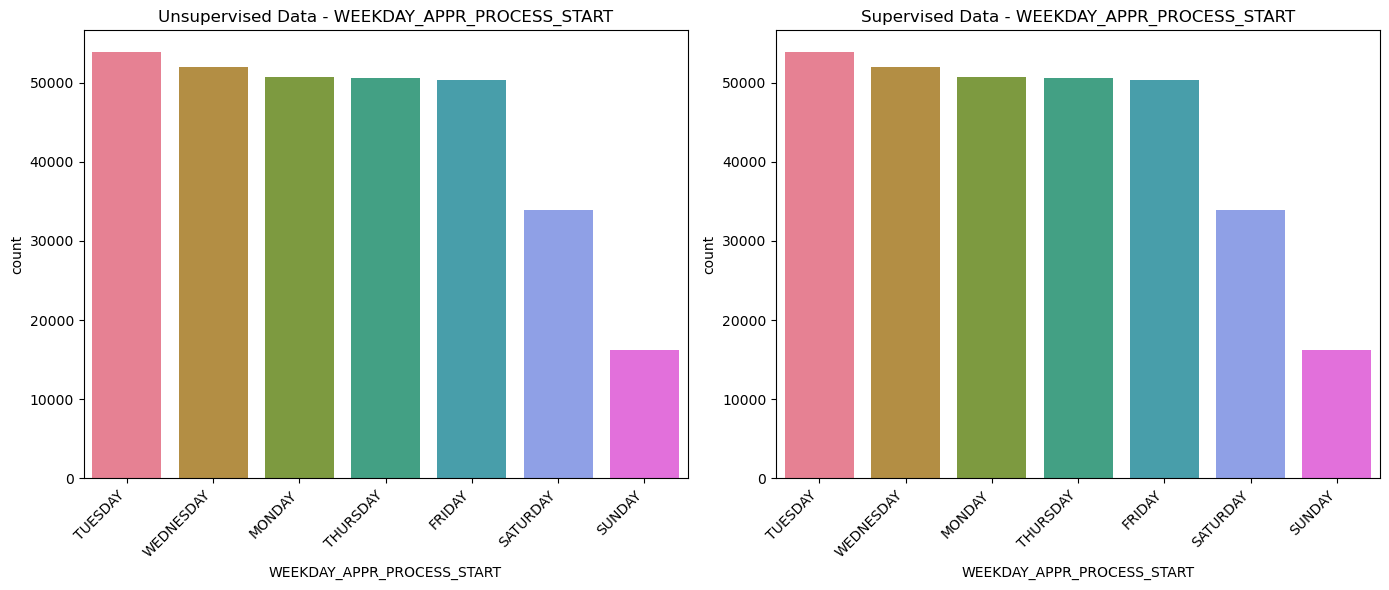

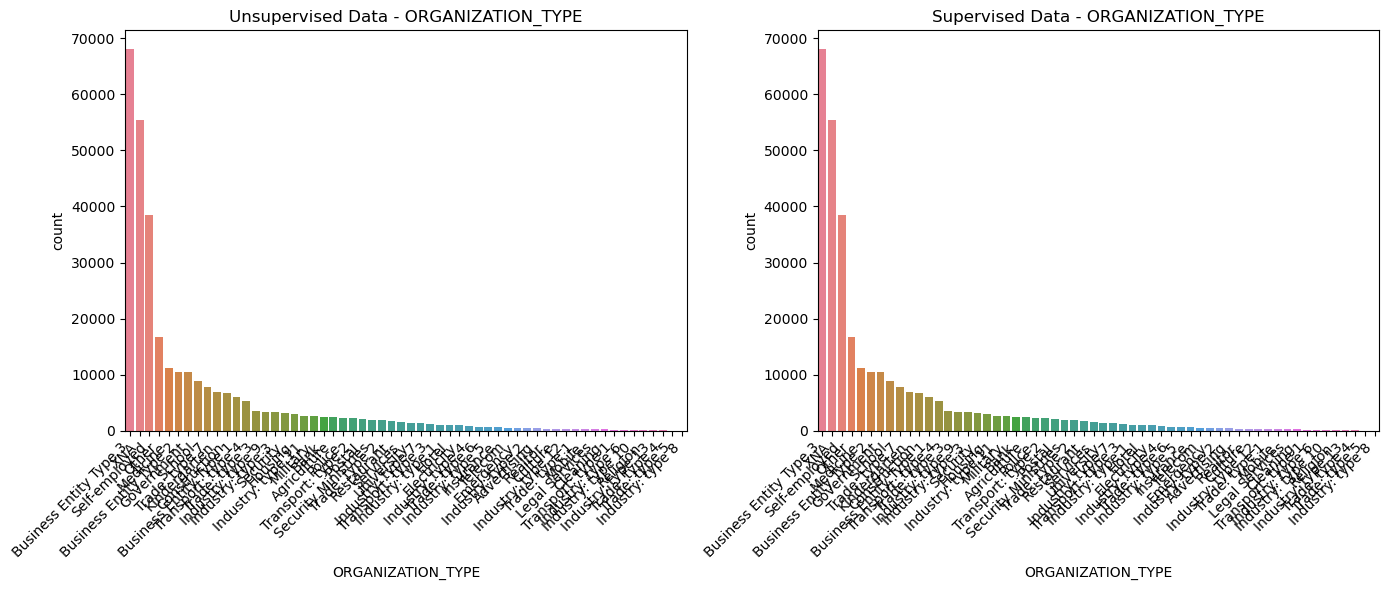

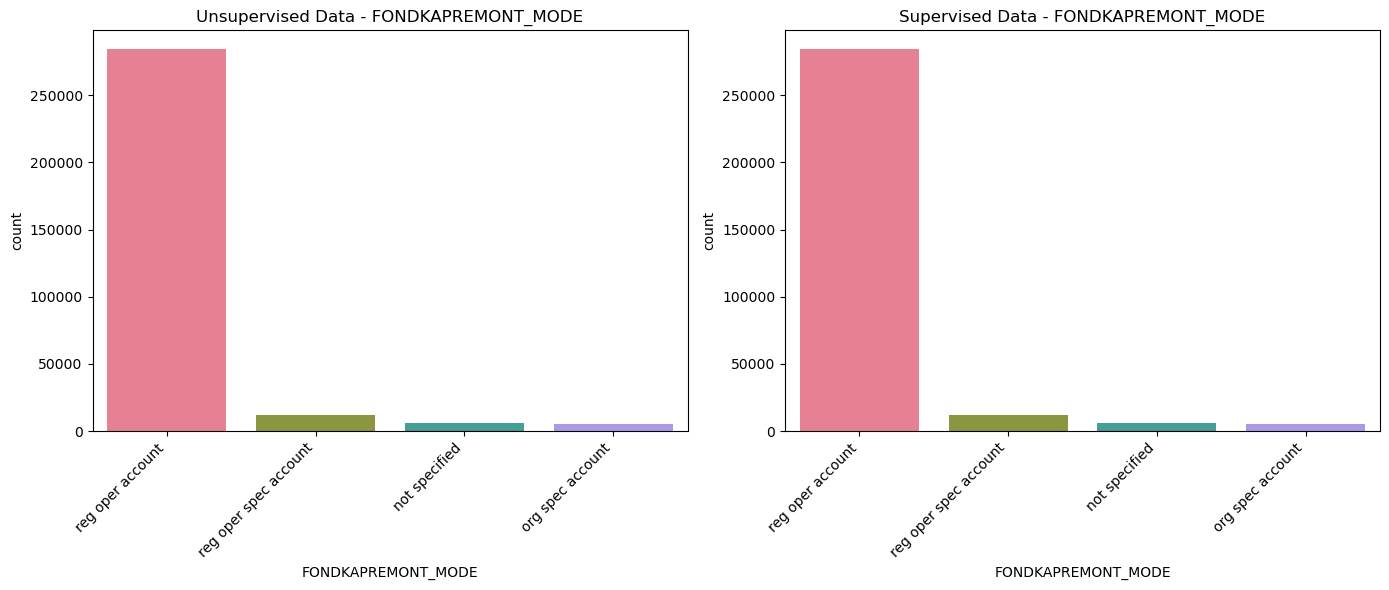

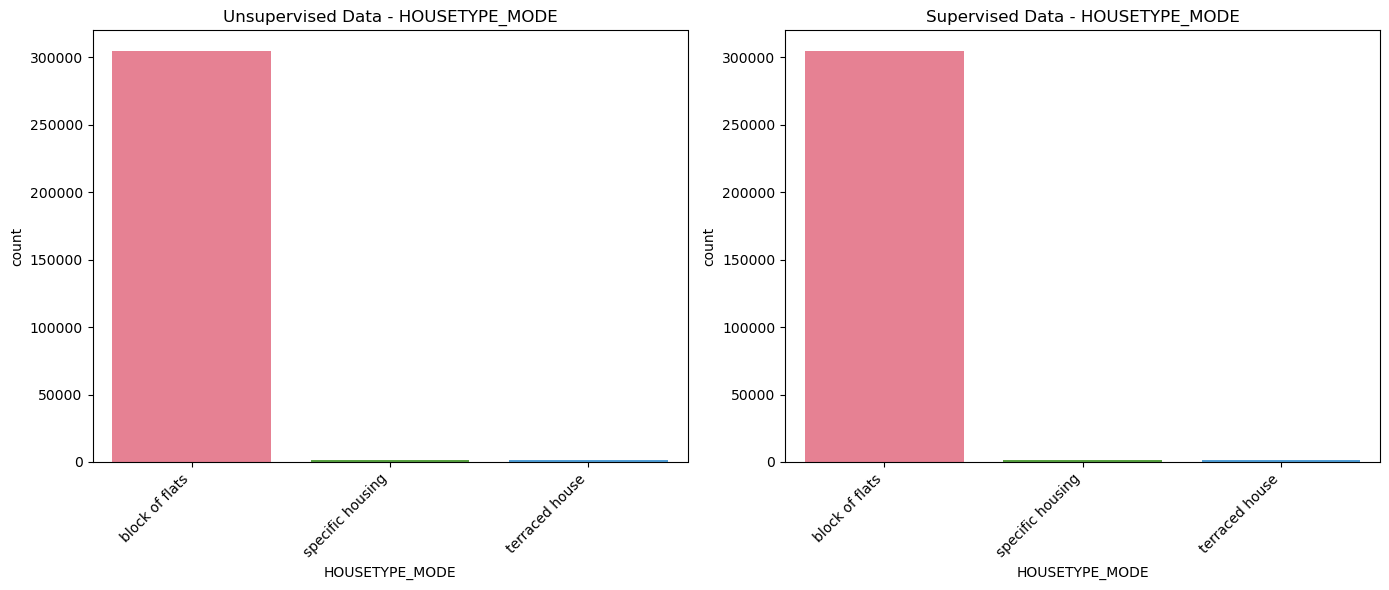

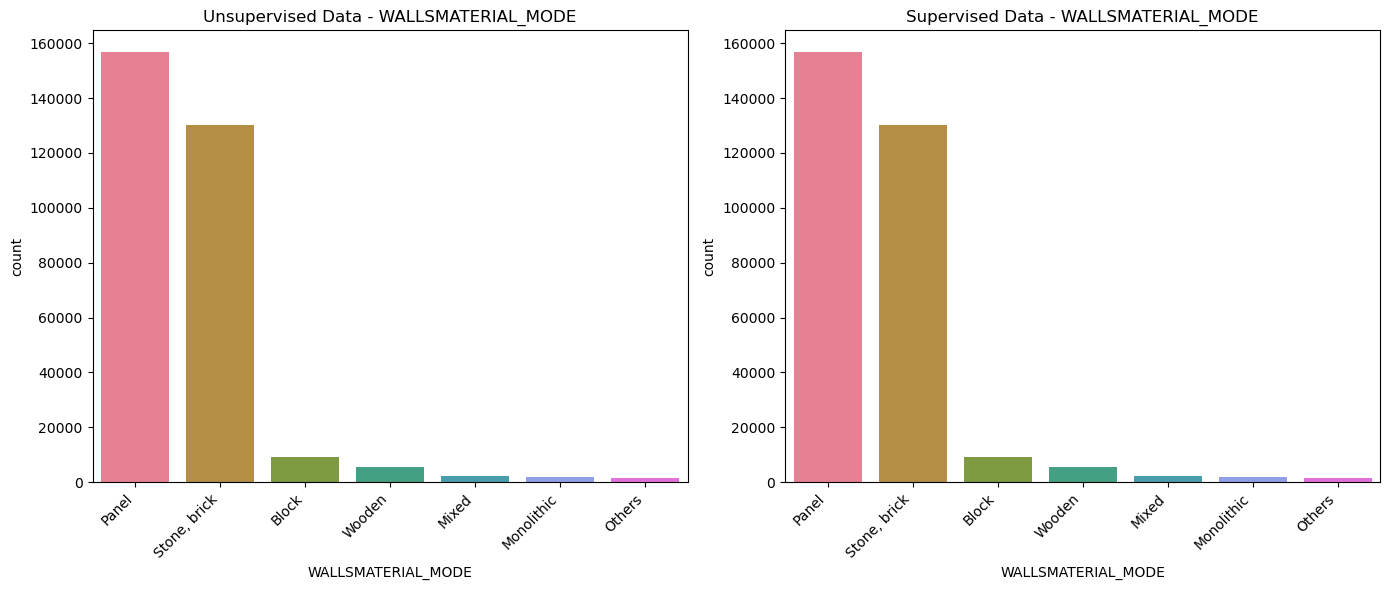

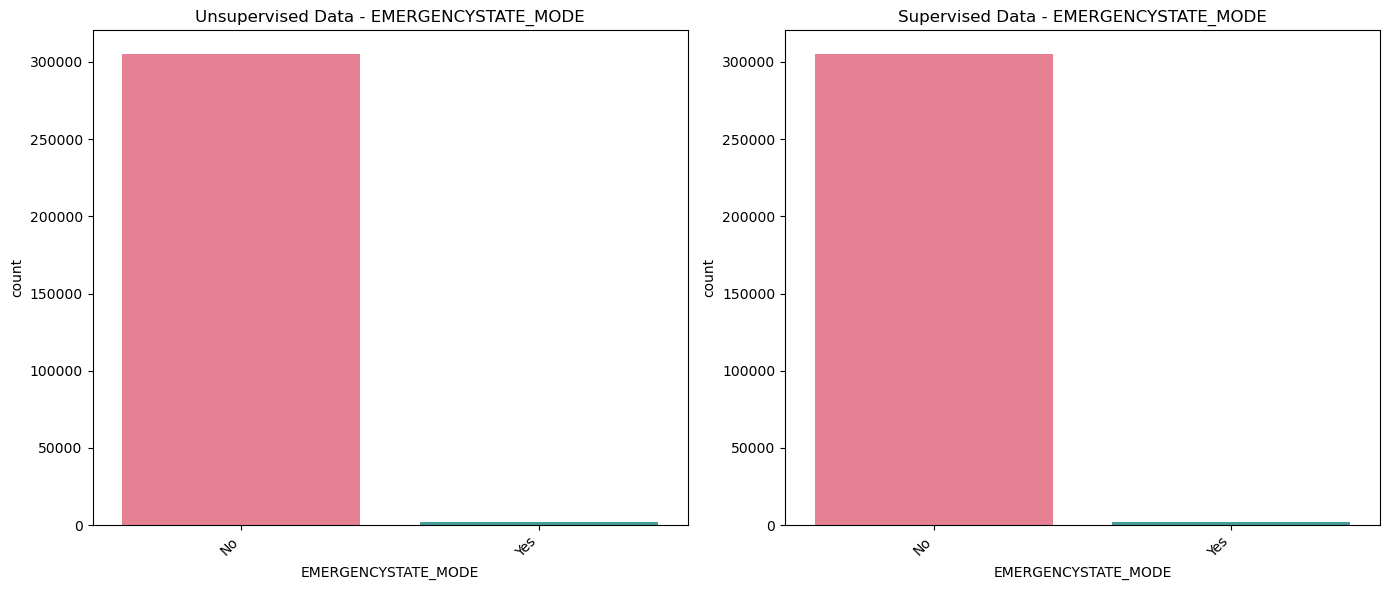

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to create a comparative bar chart with different colors for each bar
def create_comparative_bar_chart(unsupervised_data, supervised_data, column_name):
    plt.figure(figsize=(14, 6))

    # Get unique values from both uncleaned and predicted data
    unique_values = np.unique(np.concatenate([unsupervised_data.dropna(), supervised_data.dropna()]))

    # Set up a color palette with a different color for each unique value
    palette = sns.color_palette("husl", n_colors=len(unique_values))

    # Plot uncleaned data
    plt.subplot(1, 2, 1)
    sns.countplot(x=unsupervised_data, order=supervised_data.value_counts().index, palette=palette)
    plt.title(f'Unsupervised Data - {column_name}')
    plt.xticks(rotation=45, ha='right')

    # Plot predicted data
    plt.subplot(1, 2, 2)
    sns.countplot(x=supervised_data, order=supervised_data.value_counts().index, palette=palette)
    plt.title(f'Supervised Data - {column_name}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# List of categorical columns to create bar charts
categorical_columns = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

# Create bar charts for each categorical column
for column in categorical_columns:
    unsupervised_values = df_filled_unsupervised[column]
    supervised_values = df_filled[column]

    create_comparative_bar_chart(unsupervised_values, supervised_values, column)


### Load Bureau Data for Cleaning

In [72]:
# Load bureau data from array
bureau_data = data_frames['bureau']
bureau_data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [73]:
# only keep unique values for SK_ID_CURR
bureau_data = bureau_data.drop_duplicates(subset='SK_ID_CURR')

In [74]:
# Check shape of data after droping duplicate
print(bureau_data.shape)

(305811, 17)


In [82]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = bureau_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_CURR'] = bureau_data['SK_ID_CURR']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = bureau_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = bureau_data['SK_ID_CURR']

In [83]:
# Print numerical data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)

SK_ID_CURR along with Numerical Columns:
         SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0            215354       5714462         -497                   0   
7            162297       5714469        -1896                   0   
13           402440       5714475          -96                   0   
14           238881       5714482         -318                   0   
21           222183       5714491         -784                   0   
...             ...           ...          ...                 ...   
1715434      207190       5052629         -532                   0   
1715484      324956       5054382         -381                   0   
1715600      448157       5043236        -1441                   0   
1715863      345866       5053303         -375                   0   
1716261      235871       5053356        -2724                   0   

         DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0                     -153.0             -1

In [78]:
# Print categorical columns
print("\nSK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)


SK_ID_CURR along with Categorical Columns:
        CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE  SK_ID_CURR
0              Closed      currency 1  Consumer credit      215354
7              Closed      currency 1  Consumer credit      162297
13             Active      currency 1  Consumer credit      402440
14             Closed      currency 1      Credit card      238881
21             Active      currency 1      Credit card      222183
...               ...             ...              ...         ...
1715434        Closed      currency 1  Consumer credit      207190
1715484        Closed      currency 1  Consumer credit      324956
1715600        Active      currency 1         Mortgage      448157
1715863        Closed      currency 1  Consumer credit      345866
1716261        Closed      currency 1  Consumer credit      235871

[305811 rows x 4 columns]


In [84]:
# Inspect numerical and categorical columns
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_BUREAU
5714462    1
6760385    1
6760377    1
6760369    1
6760366    1
          ..
5498823    1
5498815    1
5498809    1
5498756    1
5053356    1
Name: count, Length: 305811, dtype: int64
DAYS_CREDIT
-364    221
-245    217
-371    207
-224    207
-315    203
       ... 
-4       10
-3        7
 0        5
-1        2
-2        1
Name: count, Length: 2923, dtype: int64
CREDIT_DAY_OVERDUE
0       304957
30         133
60          69
11          16
13          15
         ...  
2254         1
105          1
2770         1
2679         1
2654         1
Name: count, Length: 317, dtype: int64
DAYS_CREDIT_ENDDATE
 NaN        8244
-7.0         188
-14.0        177
-22.0        174
-42.0        171
            ... 
 10418.0       1
 4613.0        1
 4815.0        1
 10443.0       1
 6437.0        1
Name: count, Length: 10078, dtype: int64
DAYS_ENDDATE_FACT
 NaN       98124
-71.0        159
-322.0       158
-56.0        148
-84.0        146
           ...  
-2900.0        1
-2877.0   

In [85]:
# Fill columns NaN with 0
numerical_and_id = numerical_and_id.fillna(0)
numerical_and_id

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,-497,0,-153.0,-153.0,0.0,0,91323.00,0.000,0.000,0.0,-131,0.0
7,162297,5714469,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.000,0.000,0.0,-1710,0.0
13,402440,5714475,-96,0,269.0,0.0,0.0,0,89910.00,76905.000,0.000,0.0,-22,0.0
14,238881,5714482,-318,0,-187.0,-187.0,0.0,0,0.00,0.000,0.000,0.0,-185,0.0
21,222183,5714491,-784,0,1008.0,0.0,0.0,0,0.00,-411.615,411.615,0.0,-694,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715434,207190,5052629,-532,0,45.0,-227.0,0.0,0,450000.00,0.000,0.000,0.0,-31,0.0
1715484,324956,5054382,-381,0,-199.0,-199.0,0.0,0,19800.00,0.000,0.000,0.0,-199,0.0
1715600,448157,5043236,-1441,0,2197.0,0.0,0.0,0,1800000.00,1076809.500,0.000,0.0,-2,0.0
1715863,345866,5053303,-375,0,-41.0,-19.0,0.0,0,175054.50,0.000,0.000,0.0,-4,17140.5


In [86]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

CREDIT_ACTIVE
Closed      206990
Active       97967
Sold           850
Bad debt         4
Name: count, dtype: int64
CREDIT_CURRENCY
currency 1    305577
currency 2       218
currency 3        14
currency 4         2
Name: count, dtype: int64
CREDIT_TYPE
Consumer credit                           225062
Credit card                                70386
Car loan                                    4662
Mortgage                                    4468
Microloan                                    695
Another type of loan                         236
Loan for business development                226
Loan for working capital replenishment        38
Unknown type of loan                          29
Real estate loan                               5
Cash loan (non-earmarked)                      2
Loan for the purchase of equipment             2
Name: count, dtype: int64


In [87]:
# merge the numercial and categorical data after inspecting the missing values
bureau_merge_data = pd.merge(numerical_and_id,categorical_and_id,on="SK_ID_CURR")

In [89]:
# export the csv file of Cleaned table
bureau_merge_data = bureau_merge_data.to_csv('Bureau.csv', index = False)

### Load Bureau Balance Data

In [91]:
# Get bureau balance data
bureau_bal_data = data_frames['bureau_balance']
bureau_bal_data

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [92]:
# drop duplicate SK_ID_BUREAU
bureau_bal_data = bureau_bal_data.drop_duplicates(subset=['SK_ID_BUREAU'])

In [93]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = bureau_bal_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_BUREAU'] = bureau_bal_data['SK_ID_BUREAU']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = bureau_bal_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_BUREAU'] = bureau_bal_data['SK_ID_BUREAU']

# Print or use the separated data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)
print("\nSK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)

SK_ID_CURR along with Numerical Columns:
          SK_ID_BUREAU  MONTHS_BALANCE
0              5715448               0
27             5715449               0
39             5715451              -5
65             5715452               0
98             5715453               0
...                ...             ...
27299691       5041141               0
27299716       5041143             -14
27299799       5041172               0
27299877       5041332               0
27299901       5041336             -28

[817395 rows x 2 columns]

SK_ID_CURR along with Categorical Columns:
         STATUS  SK_ID_BUREAU
0             C       5715448
27            C       5715449
39            C       5715451
65            C       5715452
98            C       5715453
...         ...           ...
27299691      C       5041141
27299716      C       5041143
27299799      C       5041172
27299877      X       5041332
27299901      X       5041336

[817395 rows x 2 columns]


In [94]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_BUREAU':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

MONTHS_BALANCE
 0     610965
-1      16820
-3       5401
-2       5387
-4       5163
        ...  
-92       381
-93       358
-94       341
-95       299
-96       285
Name: count, Length: 97, dtype: int64


In [96]:
# just to make sure there is any NaN value perform fillna with 0, and check the value counts
numerical_and_id = numerical_and_id.fillna(0)

In [97]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_BUREAU':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

MONTHS_BALANCE
 0     610965
-1      16820
-3       5401
-2       5387
-4       5163
        ...  
-92       381
-93       358
-94       341
-95       299
-96       285
Name: count, Length: 97, dtype: int64


#### after performing value counts the count of 0 does not change which confirms that there is no missing data. We will keep the original data set as is.

In [98]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_BUREAU':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

STATUS
C    449603
X    203003
0    157328
1      5768
5      1258
2       286
3        86
4        63
Name: count, dtype: int64


In [99]:
# Since bureau_balance data does not contain any NaN values, so after droppping duplicates based on SK_ID_BUREAU.
# Exporting the file
bureau_data_file = bureau_bal_data.to_csv('bureau_balance.csv', index = False)

### Loading Previous Application Data

In [100]:
# Access previous application data
previous_application_data = data_frames['previous_application']
previous_application_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [101]:
# Drop duplicate SK_ID_CURR to get unqiue values
previous_application_data = previous_application_data.drop_duplicates(subset='SK_ID_CURR')

In [102]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = previous_application_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_CURR'] = previous_application_data['SK_ID_CURR']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = previous_application_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_CURR'] = previous_application_data['SK_ID_CURR']

In [103]:
# Print numerical data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)

SK_ID_CURR along with Numerical Columns:
         SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877     1730.430          17145.0     17145.0   
1           2802425      108129    25188.615         607500.0    679671.0   
2           2523466      122040    15060.735         112500.0    136444.5   
3           2819243      176158    47041.335         450000.0    470790.0   
4           1784265      202054    31924.395         337500.0    404055.0   
...             ...         ...          ...              ...         ...   
1669619     2319569      239799     4716.495          46800.0     46800.0   
1669655     2210917      174832    30439.305         243000.0    289732.5   
1669726     2253728      253940    26084.700         135000.0    135000.0   
1669862     2829648      353284    10301.940         101745.0    112491.0   
1670060     1944034      191629          NaN              0.0         0.0   

         AMT_DOWN_PAYMENT  AMT_GOO

In [104]:
print("\nSK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)


SK_ID_CURR along with Categorical Columns:
        NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
0           Consumer loans                   SATURDAY   
1               Cash loans                   THURSDAY   
2               Cash loans                    TUESDAY   
3               Cash loans                     MONDAY   
4               Cash loans                   THURSDAY   
...                    ...                        ...   
1669619     Consumer loans                     FRIDAY   
1669655         Cash loans                     FRIDAY   
1669726         Cash loans                    TUESDAY   
1669862     Consumer loans                     FRIDAY   
1670060         Cash loans                     SUNDAY   

        FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
0                                 Y                    XAP   
1                                 Y                    XNA   
2                                 Y                    XNA   
3                      

In [108]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_PREV
2030495    1
2048675    1
1036322    1
1259959    1
1593744    1
          ..
2244263    1
1005010    1
1641790    1
1873272    1
1944034    1
Name: count, Length: 338857, dtype: int64
AMT_ANNUITY
NaN          51095
2250.000      6723
9000.000      2381
6750.000      2365
11250.000     2266
             ...  
10043.550        1
9453.825         1
6622.605         1
13649.130        1
10301.940        1
Name: count, Length: 159902, dtype: int64
AMT_APPLICATION
0.00         54965
45000.00      9205
225000.00     7191
135000.00     6738
450000.00     5984
             ...  
40923.00         1
82363.50         1
84667.14         1
315135.00        1
182092.50        1
Name: count, Length: 51504, dtype: int64
AMT_CREDIT
0.0         44546
45000.0      7242
225000.0     3468
135000.0     3301
450000.0     3164
            ...  
352269.0        1
225045.0        1
537669.0        1
243364.5        1
179275.5        1
Name: count, Length: 55379, dtype: int64
AMT_DOWN_PAYMENT
NaN     

In [109]:
# Fill NaN values in columns (except the target column) with zeros
numerical_and_id.fillna({col: 0 for col in numerical_and_id.columns if col != 'NFLAG_INSURED_ON_APPROVAL'}, inplace=True)

# Prepare features and target variable
X = numerical_and_id.drop(columns=['NFLAG_INSURED_ON_APPROVAL'])  # Features
y = numerical_and_id['NFLAG_INSURED_ON_APPROVAL']  # Target

In [114]:
# Assuming `numerical_and_id` is your DataFrame and it includes 'NFLAG_INSURED_ON_APPROVAL'
df = numerical_and_id  # Example DataFrame

# Separate features and target variable
features = df.drop(['NFLAG_INSURED_ON_APPROVAL', 'SK_ID_PREV'], axis=1)  # Assuming 'SK_ID_PREV' is the ID column
target = df['NFLAG_INSURED_ON_APPROVAL']

# Fill NaNs in features with zero
features_filled = features.fillna(0)

# Splitting the dataset into known and unknown 'NFLAG_INSURED_ON_APPROVAL' sets
known_mask = target.notna()
X_known = features_filled[known_mask]
y_known = target[known_mask]

# Split known data into training and testing to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicting and evaluating on the test set
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Check if there are any rows with unknown 'NFLAG_INSURED_ON_APPROVAL'
X_unknown = features_filled.loc[~known_mask]
if X_unknown.shape[0] > 0:
    # Predict 'NFLAG_INSURED_ON_APPROVAL' for rows where it's missing
    predicted_nflag = clf.predict(X_unknown)

    # Filling in the missing 'NFLAG_INSURED_ON_APPROVAL' values in the original DataFrame
    df.loc[~known_mask, 'NFLAG_INSURED_ON_APPROVAL'] = predicted_nflag
else:
    print("No rows with unknown 'NFLAG_INSURED_ON_APPROVAL' found. No prediction necessary.")

Accuracy: 0.9376881307914773
No rows with unknown 'NFLAG_INSURED_ON_APPROVAL' found. No prediction necessary.


In [119]:
# Inspecting values after prediction of numerical values
# Loop through each categorical column
for column in df.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(df[column].value_counts(dropna=False))

SK_ID_PREV
2030495    1
2048675    1
1036322    1
1259959    1
1593744    1
          ..
2244263    1
1005010    1
1641790    1
1873272    1
1944034    1
Name: count, Length: 338857, dtype: int64
AMT_ANNUITY
0.000        51406
2250.000      6723
9000.000      2381
6750.000      2365
11250.000     2266
             ...  
10043.550        1
9453.825         1
6622.605         1
13649.130        1
10301.940        1
Name: count, Length: 159901, dtype: int64
AMT_APPLICATION
0.00         54965
45000.00      9205
225000.00     7191
135000.00     6738
450000.00     5984
             ...  
40923.00         1
82363.50         1
84667.14         1
315135.00        1
182092.50        1
Name: count, Length: 51504, dtype: int64
AMT_CREDIT
0.0         44546
45000.0      7242
225000.0     3468
135000.0     3301
450000.0     3164
            ...  
352269.0        1
225045.0        1
537669.0        1
243364.5        1
179275.5        1
Name: count, Length: 55379, dtype: int64
AMT_DOWN_PAYMENT
0.000   

In [120]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_CURR':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_TYPE
Consumer loans     199628
Cash loans         105751
Revolving loans     33426
XNA                    52
Name: count, dtype: int64
WEEKDAY_APPR_PROCESS_START
SATURDAY     52386
WEDNESDAY    50109
TUESDAY      49797
FRIDAY       49717
THURSDAY     49219
MONDAY       49061
SUNDAY       38568
Name: count, dtype: int64
FLAG_LAST_APPL_PER_CONTRACT
Y    337851
N      1006
Name: count, dtype: int64


NAME_CASH_LOAN_PURPOSE
XAP                                 233106
XNA                                  94502
Repairs                               3758
Other                                 2493
Urgent needs                          1503
Buying a used car                      451
Everyday expenses                      404
Medicine                               386
Building a house or an annex           373
Education                              256
Journey                                211
Payments on other loans                205
Purchase of electronic equipment       199
Wedding / gift / holiday               176
Furniture                              157
Car repairs                            156
Buying a new car                       142
Buying a home                          134
Buying a holiday home / land            84
Business development                    66
Gasification / water supply             61
Buying a garage                         18
Hobby                          

In [ ]:
#  Even after using RandomforestClassifier predictor; no yes(1) values predicted which is evident from before and after value count.

In [121]:
# merge numerical and categorical data
merge_data_previous = pd.merge(categorical_and_id,df , on = ['SK_ID_CURR'])

In [122]:
# drop any duplicate values
merge_data_previous =merge_data.drop_duplicates(subset=['SK_ID_CURR'])

In [123]:
# Predicting categorical data 

# Identify columns with missing categorical values
categorical_columns_with_missing = merge_data_previous.select_dtypes(include='object').columns[merge_data_previous.select_dtypes(include='object').isnull().any()]

# Create a copy of the DataFrame
df_filled = merge_data_previous.copy()

# Iterate over each column with missing categorical values
for col in categorical_columns_with_missing:
    print(f"Filling missing values for {col}")

    # Create a mask for missing values
    missing_mask = df_filled[col].isnull()

    # Split the data into known and unknown samples
    known_samples = df_filled[~missing_mask]
    unknown_samples = df_filled[missing_mask]

    # Drop the target column from known samples
    X_known = known_samples.drop(columns=[col])
    y_known = known_samples[col]

    # Create a preprocessor for numerical and categorical columns
    numerical_features = X_known.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_known.select_dtypes(include='object').columns

    numerical_transformer = SimpleImputer(strategy='mean')
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Create and fit the classifier
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

    clf.fit(X_known, y_known)

    # Predict missing values for unknown samples
    X_unknown = unknown_samples.drop(columns=[col])
    y_unknown_predicted = clf.predict(X_unknown)

    # Fill missing values in the original DataFrame
    df_filled.loc[missing_mask, col] = y_unknown_predicted

    print(f"Filled {sum(missing_mask)} missing values for {col}")

    # Check if there are still NaN values after imputation
    nan_columns = df_filled.columns[df_filled.isnull().any()]
    if nan_columns.any():
        print(f"NaN values still present after imputation in columns: {nan_columns}")

# Ensure there are no missing values left
print("Number of missing values after filling:", df_filled.isnull().sum().sum())


Filling missing values for NAME_TYPE_SUITE
Filled 161580 missing values for NAME_TYPE_SUITE
NaN values still present after imputation in columns: Index(['PRODUCT_COMBINATION'], dtype='object')
Filling missing values for PRODUCT_COMBINATION
Filled 52 missing values for PRODUCT_COMBINATION
Number of missing values after filling: 0


In [124]:
# Out put cleaned table
previous_application_data_output =df_filled.to_csv('previous_application.csv', index=False)

### Loading Credit Card Balance data

In [142]:
# Access Credit card balance data
credit_card_balance_data = data_frames['credit_card_balance']
credit_card_balance_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [143]:
# drop duplicate SK_ID_PREV values
credit_card_balance_data = credit_card_balance_data.drop_duplicates(subset='SK_ID_PREV')

In [144]:
# Checking dataframe after dropping duplicates
print(credit_card_balance_data.shape)

(104307, 23)


In [145]:
# Separate SK_ID_CURR along with numerical columns
numerical_and_id = credit_card_balance_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_PREV'] = credit_card_balance_data['SK_ID_PREV']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = credit_card_balance_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_PREV'] = credit_card_balance_data['SK_ID_PREV']

In [146]:
# Print numerical data
print("SK_ID_CURR along with Numerical Columns:")
print(numerical_and_id)

SK_ID_CURR along with Numerical Columns:
         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
...             ...         ...             ...          ...   
3787849     2339982      318916              -1        0.000   
3788692     2720102      174455              -1        0.000   
3802178     1897864      315041              -2        0.000   
3817940     2481982      382749              -1        0.000   
3823070     2191610      349216              -1        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                         135000                       0.0   
1                          45000                    2250.0   
2   

In [147]:
# Print categorical data
print("SK_ID_CURR along with Categorical Columns:")
print(categorical_and_id)

SK_ID_CURR along with Categorical Columns:
        NAME_CONTRACT_STATUS  SK_ID_PREV
0                     Active     2562384
1                     Active     2582071
2                     Active     1740877
3                     Active     1389973
4                     Active     1891521
...                      ...         ...
3787849               Active     2339982
3788692               Active     2720102
3802178               Active     1897864
3817940               Active     2481982
3823070               Active     2191610

[104307 rows x 2 columns]


In [148]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_PREV
    if column == 'SK_ID_PREV':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_CURR
355767    4
187294    3
263421    3
120076    3
206455    3
         ..
212363    1
231532    1
241457    1
234481    1
382749    1
Name: count, Length: 103558, dtype: int64
MONTHS_BALANCE
-4     8208
-3     7989
-2     7844
-5     7394
-6     6858
       ... 
-83     183
-71     167
-73     166
-74     149
-56     142
Name: count, Length: 96, dtype: int64
AMT_BALANCE
0.000         61192
67.500          151
130.500          50
46570.500        35
270.000          23
              ...  
461086.110        1
92467.755         1
203496.975        1
164247.210        1
163102.500        1
Name: count, Length: 41843, dtype: int64
AMT_CREDIT_LIMIT_ACTUAL
0         13845
45000     13238
135000    11486
180000    10233
450000     8303
          ...  
553500        1
477000        1
508500        1
661500        1
643500        1
Name: count, Length: 151, dtype: int64
AMT_DRAWINGS_ATM_CURRENT
0.0         55423
NaN         35689
4500.0        975
45000.0       923
9000.0        740
   

In [149]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_PREV
    if column == 'SK_ID_PREV':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_STATUS
Active           99391
Completed         4485
Signed             412
Demand              11
Sent proposal        8
Name: count, dtype: int64


In [150]:
# Since our categorical data does not contain NaN values we can directly fillna(0)
credit_card_balance_data = credit_card_balance_data.fillna(0)
credit_card_balance_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787849,2339982,318916,-1,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0
3788692,2720102,174455,-1,0.000,225000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0
3802178,1897864,315041,-2,0.000,270000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0
3817940,2481982,382749,-1,0.000,270000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0


In [151]:
# output Credit_card_balance 
credit_card_balance_data_output = credit_card_balance_data.to_csv('credit_card_balance.csv', index = False)

### Load POS CASH Balance data

In [152]:
# Get POS_CASH_Balance data
POS_CASH_balance_data = data_frames['POS_CASH_balance']
POS_CASH_balance_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [153]:
# We will go by dropping duplicate values
POS_CASH_balance_data = POS_CASH_balance_data.drop_duplicates(subset='SK_ID_PREV')

In [156]:
# Inspect data after dropping duplicates
# Separate SK_ID_PREV along with numerical columns
numerical_and_id = POS_CASH_balance_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_PREV'] = POS_CASH_balance_data['SK_ID_PREV']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = POS_CASH_balance_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_PREV'] = POS_CASH_balance_data['SK_ID_PREV']

In [157]:
# Print or use the separated data
print("SK_ID_PREV along with Numerical Columns:")
print(numerical_and_id)

SK_ID_CURR along with Numerical Columns:
         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0           1803195      182943             -31            48.0   
1           1715348      367990             -33            36.0   
2           1784872      397406             -32            12.0   
3           1903291      269225             -35            48.0   
4           2341044      334279             -35            36.0   
...             ...         ...             ...             ...   
9996589     2672095      388093              -2            36.0   
9996600     2617335      172821              -2            36.0   
9996602     2452932      112263              -2            12.0   
9996603     1980876      448766              -1            24.0   
9999763     2308284      290058             -41             4.0   

         CNT_INSTALMENT_FUTURE  SK_DPD  SK_DPD_DEF  
0                         45.0       0           0  
1                         35.0       0          

In [158]:
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_PREV
    if column == 'SK_ID_PREV':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_CURR
309133    26
152214    24
197583    23
272099    23
328085    22
          ..
427031     1
212717     1
327038     1
440558     1
144536     1
Name: count, Length: 337252, dtype: int64
MONTHS_BALANCE
-12    24244
-11    23687
-3     23071
-2     22598
-10    22245
       ...  
-90     3789
-86     3326
-91     3293
-84     3070
-85     2615
Name: count, Length: 96, dtype: int64
CNT_INSTALMENT
12.0    234918
6.0     152970
10.0    123746
24.0     91793
18.0     51798
         ...  
56.0         2
92.0         1
57.0         1
84.0         1
52.0         1
Name: count, Length: 62, dtype: int64
CNT_INSTALMENT_FUTURE
0.0     124712
6.0      62373
4.0      61840
5.0      59713
3.0      59525
         ...  
64.0         3
70.0         3
67.0         2
85.0         1
80.0         1
Name: count, Length: 74, dtype: int64
SK_DPD
0       921689
1         1594
2         1244
3         1085
4          832
         ...  
437          1
501          1
983          1
943          1
3257    

In [159]:
# Print or use the separated data
print("SK_ID_PREV along with Categorical Columns:")
print(categorical_and_id)

SK_ID_PREV along with Categorical Columns:
        NAME_CONTRACT_STATUS  SK_ID_PREV
0                     Active     1803195
1                     Active     1715348
2                     Active     1784872
3                     Active     1903291
4                     Active     2341044
...                      ...         ...
9996589               Active     2672095
9996600               Active     2617335
9996602               Active     2452932
9996603               Active     1980876
9999763            Completed     2308284

[936325 rows x 2 columns]


In [160]:
# Loop through each categorical column
for column in categorical_and_id.columns:
    # Skip SK_ID_CURR
    if column == 'SK_ID_PREV':
        continue
    # Print value counts for the current column
    print(categorical_and_id[column].value_counts(dropna=False))

NAME_CONTRACT_STATUS
Active                   832489
Completed                 92492
Signed                     9915
Returned to the store       886
Approved                    476
Demand                       61
Canceled                      4
Amortized debt                2
Name: count, dtype: int64


In [161]:
# since categorical data in POS_CASH_balance_data does not have NaN, even numerical values are very few NaN values, 
#  so we fill main table with fillna(0)
POS_CASH_balance_data = POS_CASH_balance_data.fillna(0)

In [162]:
# Output POS CASH Balance data to csv
POS_CASH_balance_data_output = POS_CASH_balance_data.to_csv('pos_cash_balance.csv',index = False)

### Load Installments_payments data

In [163]:
# access installmets_payments data
installments_payments_data = data_frames['installments_payments']
installments_payments_data

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [164]:
# Drop duplicate SK_ID_PREV values from dataset
installments_payments_data = installments_payments_data.drop_duplicates(subset='SK_ID_PREV')

In [165]:
# Dataset shape after dropping duplicate values based on SK_ID_PREV
print(installments_payments_data.shape)

(997752, 8)


In [166]:
# Inspect data after dropping duplicates
# Separate SK_ID_PREV along with numerical columns
numerical_and_id = installments_payments_data.select_dtypes(include=['number']).copy()

# Include SK_ID_CURR in numerical set
numerical_and_id['SK_ID_PREV'] = installments_payments_data['SK_ID_PREV']

# Separate SK_ID_CURR along with categorical columns
categorical_and_id = installments_payments_data.select_dtypes(include=['object', 'category']).copy()

# Include SK_ID_CURR in categorical set
categorical_and_id['SK_ID_PREV'] = installments_payments_data['SK_ID_PREV']

In [167]:
# Print numerical separated data
print("SK_ID_PREV along with Numerical Columns:")
print(numerical_and_id)

SK_ID_PREV along with Numerical Columns:
          SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13603461     2363009      430339                     2.0   
13604077     1231783      448767                     2.0   
13604314     1984920      416501                     1.0   
13604544     1946334      415418                     2.0   
13604682     1276288      448485                     2.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                     

In [168]:
# Print categorical dataset
print("SK_ID_PREV along with Numerical Columns:")
print(categorical_and_id)

SK_ID_PREV along with Numerical Columns:
          SK_ID_PREV
0            1054186
1            1330831
2            2085231
3            2452527
4            2714724
...              ...
13603461     2363009
13604077     1231783
13604314     1984920
13604544     1946334
13604682     1276288

[997752 rows x 1 columns]


In [ ]:
# There is no categorical columns in the table so we will proceed with numerical data only.

In [169]:
# Inspect numerical data for cleaning purpose
# Loop through each categorical column
for column in numerical_and_id.columns:
    # Skip SK_ID_PREV
    if column == 'SK_ID_PREV':
        continue
    # Print value counts for the current column
    print(numerical_and_id[column].value_counts(dropna=False))

SK_ID_CURR
309133    26
272099    24
152214    24
328085    23
197583    22
          ..
249113     1
283105     1
260298     1
228862     1
405063     1
Name: count, Length: 339587, dtype: int64
NUM_INSTALMENT_VERSION
1.0      800461
2.0       91945
0.0       72678
3.0       19136
4.0        5389
5.0        3355
6.0        1369
7.0        1052
8.0         517
9.0         501
10.0        270
11.0        232
12.0        172
13.0        161
14.0        103
15.0        100
17.0         59
16.0         46
20.0         32
18.0         29
19.0         27
21.0         25
22.0         23
23.0         14
24.0         11
25.0          8
27.0          7
30.0          5
26.0          4
29.0          4
31.0          2
28.0          2
34.0          2
33.0          1
39.0          1
61.0          1
72.0          1
38.0          1
37.0          1
52.0          1
178.0         1
40.0          1
35.0          1
32.0          1
Name: count, dtype: int64
NUM_INSTALMENT_NUMBER
1      149975
2      126168
3

In [170]:
# After dropping duplicate SK_ID_PREV, we have no NaN values in the data set
# So we can export the file
installments_payments_data = installments_payments_data.to_csv('installmets_payments.csv',index = False)